<a href="https://colab.research.google.com/github/the-confused-genius/salary-prediction/blob/main/fewer%20features/Salary_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Salary prediction
Using k mean clustering

##importing libraries 

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

##Select the dataset

In [2]:
#from google.colab import files
#upload_file = files.upload()
link = 'https://raw.githubusercontent.com/the-confused-genius/salary-prediction/main/fewer%20features/salary.csv'

##Load the dataset into the memeory

In [3]:
df = pd.read_csv(link)
df.head()

,age,educational-num,capital-gain,hours-per-week,income
0,25,7,0,40,<=50K
1,38,9,0,50,<=50K
2,28,12,0,40,>50K
3,44,10,7688,40,>50K
4,18,10,0,30,<=50K


##Summarise the dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   educational-num  48842 non-null  int64 
 2   capital-gain     48842 non-null  int64 
 3   hours-per-week   48842 non-null  int64 
 4   income           48842 non-null  object
dtypes: int64(4), object(1)
memory usage: 1.9+ MB


##Mapping the income data to binary value

In [5]:
df['income'].value_counts()

#alternative code
#income_set = set(df['income'])  

<=50K    37155
>50K     11687
Name: income, dtype: int64

In [6]:
df.income = df.income.replace(to_replace = '>50K',value = 1)
df.income = df.income.replace(to_replace = '<=50K',value = 0)

#alternative code     
#df['income'] = df['income'].map({'<=50K' : 0, '>50K' : 1}).astype(int)

df.head()

,age,educational-num,capital-gain,hours-per-week,income
0,25,7,0,40,0
1,38,9,0,50,0
2,28,12,0,40,1
3,44,10,7688,40,1
4,18,10,0,30,0


##Segregate dataset into x and y
where x is the independent variable
and y is the dependent variable aka target variable


* x has the features age educational-num	capital-gain	hours-per-week	income
* y has the features income

In [7]:
x = df[['age', 'educational-num',	'capital-gain', 'hours-per-week']]
y = df['income']

#alternative code
#x = df.iloc[:,:-1].values
#y = df.iloc[:,-1].values

##Splitting the dataset into train and test sets

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=0)

##Feature Scaling 
We scale the data to make all the features contribute equally to the result 
* fit-transform - fit method is calculating the mean and variance of each of the features present in the data
* transform - transform method is transforming all the features using the respective mean and variance 

We want the test data to be completely new and a surprise set for the model

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

##Finding the Best K-value

Text(0, 0.5, 'Mean Error')

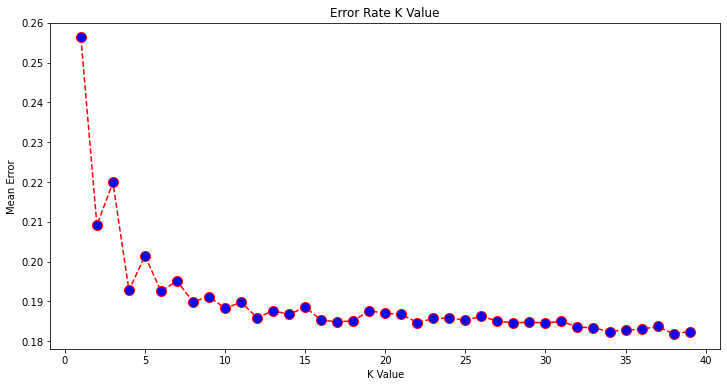

In [10]:
error = []
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
%matplotlib inline 

#calculating the error for K values between 1 and 0
for i in range(1,40):
  model = KNeighborsClassifier(n_neighbors=i)
  model.fit(x_train,y_train)
  pred_i = model.predict(x_test)
  error.append(np.mean(pred_i!=y_test))

plt.figure(figsize=(12,6))
plt.plot(range(1,40),error,color='red',linestyle='dashed',marker='o',markerfacecolor='blue',markersize=10)
plt.title("Error Rate K Value")
plt.xlabel('K Value')
plt.ylabel('Mean Error')

##Selecting the lowest k value

In [11]:
temp = error[0]
index = 0
for i in range(0,39):
  if(error[i]<temp):
    temp = error[i]
    index = i

print(f"Hence the lowest k value is {index}")

Hence the lowest k value is 37


##Training the model

In [12]:
model = KNeighborsClassifier(n_neighbors=index,metric='minkowski',p=2)
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=37)

##Testing the model

In [13]:
y_pred = model.predict(x_test)
y_test = np.array(y_test)
num = np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1)
print(num)

[[0 0]
 [1 1]
 [1 1]
 ...
 [0 0]
 [1 0]
 [0 0]]


##Evaluating the Model 

In [14]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test,y_pred)

print("Confusion Matrix :")
print(cm)

print("Accuracy of the model is {0}%".format(accuracy_score(y_test,y_pred)*100))

Confusion Matrix :
[[7013  407]
 [1388  961]]
Accuracy of the model is 81.62555020984748%


##Predicting from the input

In [15]:
age = int(input("Enter the Employee's Age :"))
edu = int(input("Enter the Employee's Education :"))
cg = int(input("Enter the Employee's Capital Gain :"))
wh = int(input("Enter the Employee's Hour's per week :"))
newemp = [[age,edu,cg,wh]]
result = model.predict(sc.transform(newemp))

if result ==1:
  print("Employee might get salary above 50K")
else:
  print("Employee might not get salary above 50K")

Enter the Employee's Age :45
Enter the Employee's Education :16
Enter the Employee's Capital Gain :0
Enter the Employee's Hour's per week :35
Employee might get salary above 50K
